In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
proj = '48Ca'
trg = '208Pb'
cn = '256No'
bf = 1.0
ch = 'xn'
sigr = 1.5
bf_diff = 0.0

df10_mb_xn = pd.read_csv('data/' + proj + '_' + trg + '_' + cn + '_' + ch + '_' + 'IFUS10' + '_barfac' + f'{bf:.1f}' + '_sigr' + str(sigr) + '.dat', sep='\t')
df0_mb_xn = pd.read_csv('data/' + proj + '_' + trg + '_' + cn + '_' + ch + '_' + 'IFUS0' + '_barfac' + f'{bf:.1f}' + '_sigr' + str(sigr) + '.dat', sep='\t')

ch = 'pxn'
df10_mb_pxn = pd.read_csv('data/' + proj + '_' + trg + '_' + cn + '_' + ch + '_' + 'IFUS10' + '_barfac' + f'{bf:.1f}' + '_sigr' + str(sigr) + '.dat', sep='\t')
df0_mb_pxn = pd.read_csv('data/' + proj + '_' + trg + '_' + cn + '_' + ch + '_' + 'IFUS0' + '_barfac' + f'{bf:.1f}' + '_sigr' + str(sigr) + '.dat', sep='\t')

## Experimental values with errors

In [32]:
# #48Ca+159Tb - Mayorov mb
# e_lab = [185.1,190.8,193,193.5,197.8,198,201.3,203.1,204.1,209.4]
# exp = [[np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,0.8], [np.nan,np.nan,1.5,1.3,1.6,2.7,16.7,17.5,23.3,21.1], [3,6.1,10.9,12.6,12.5,10.7,7,5.8,3.1,2.2], [5.1,4.2,3.5,2.5,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan]]
# err = [[np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,0.2], [np.nan,np.nan,0.5,0.5,0.7,0.6,4.5,7,7.1,7.8], [0.6,1.4,1.8,1.9,2,1.6,1.1,1.9,0.6,2], [1.7,3,2,1.6,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan]]

e_lab = [13.2,16.3,16.7,17.4,19.3,19.7,21.9,25.2,28.8]
exp = [[27,212,420,730,2344,3200,1845,418,39], [27,np.nan,260,np.nan,np.nan,180,np.nan,np.nan,np.nan]]

## Scaling of the values to mb, ub or nb

In [33]:
dfm10_mb_xn = df10_mb_xn.melt(id_vars=['E_lab', 'E*/MeV'], var_name='isotope', value_name='CS')
dfm0_mb_xn = df0_mb_xn.melt(id_vars=['E_lab', 'E*/MeV'], var_name='isotope', value_name='CS')

dfm10_mb_pxn = df10_mb_pxn.melt(id_vars=['E_lab', 'E*/MeV'], var_name='isotope', value_name='CS')
dfm0_mb_pxn = df0_mb_pxn.melt(id_vars=['E_lab', 'E*/MeV'], var_name='isotope', value_name='CS')

#scale the data to either nb, ub or whatever
dfm10_xn = dfm10_mb_xn
dfm0_xn = dfm0_mb_xn
df10_xn = df10_mb_xn
df0_xn = df0_mb_xn

dfm10_pxn = dfm10_mb_pxn
dfm0_pxn = dfm0_mb_pxn
df10_pxn = df10_mb_pxn
df0_pxn = df0_mb_pxn

mb = 1
ub = 1e3
nb = 1e6

scale = nb
dfm10_xn['CS'] = dfm10_mb_xn['CS']*scale
dfm0_xn['CS'] = dfm0_mb_xn['CS']*scale
df10_xn.iloc[:,2:] = df10_mb_xn.iloc[:,2:] * scale
df0_xn.iloc[:,2:] = df0_mb_xn.iloc[:,2:] * scale

dfm10_pxn['CS'] = dfm10_mb_pxn['CS']*scale
dfm0_pxn['CS'] = dfm0_mb_pxn['CS']*scale
df10_pxn.iloc[:,2:] = df10_mb_pxn.iloc[:,2:] * scale
df0_pxn.iloc[:,2:] = df0_mb_pxn.iloc[:,2:] * scale

# dfm10.describe()
# exp = exp * scale

## Plotting

/tmp/ipykernel_194204/3124647903.py:8: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.lineplot(x='E*/MeV', y='CS', hue='isotope', data=dfm10_xn[dfm10_xn['isotope'].isin(list(df10_xn.columns[plot_from+2:-plot_to]))], palette=colors)
/tmp/ipykernel_194204/3124647903.py:23: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.lineplot(x='E*/MeV', y='CS', hue='isotope', data=dfm0_xn[dfm0_xn['isotope'].isin(list(df10_xn.columns[plot_from+2:-plot_to]))], linestyle='--', legend=None, palette=colors)
/home/adam/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/tmp/ipykernel_194204/3124647903.py:27: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.lineplot(x='E*/MeV', y='CS', hue='isotope', data=dfm10_pxn[dfm10_pxn['isotope

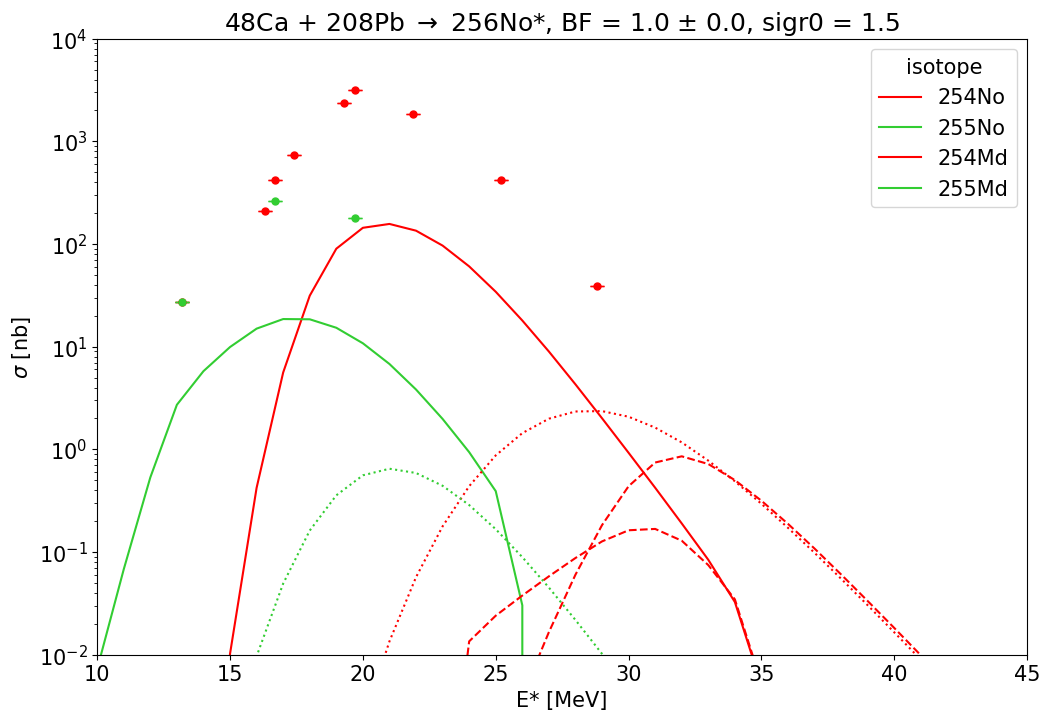

In [34]:
colors = ['red', 'limegreen', 'blue', 'gold', 'black', 'turquoise', 'magenta', 'grey', 'olive', 'brown']
sns.color_palette("dark")

plot_from = 7
plot_to = 1

fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(x='E*/MeV', y='CS', hue='isotope', data=dfm10_xn[dfm10_xn['isotope'].isin(list(df10_xn.columns[plot_from+2:-plot_to]))], palette=colors)
plt.semilogy()
plt.ylim(1e-2, 1e4)
# plt.xlim(200, 230)
plt.xlim(10,45)
plt.title(proj + ' + ' + trg + r' $\rightarrow$ ' + cn + '*, BF = ' + str(bf) + ' $\pm$ ' + str(bf_diff) + ', sigr0 = ' + str(sigr))
if scale == mb:
    plt.ylabel('$\sigma$ [mb]')
elif scale == ub:
    plt.ylabel('$\sigma$ [$\mu$b]')
elif scale == nb:
    plt.ylabel('$\sigma$ [nb]')
# plt.xlabel('$E_{proj}$ [MeV]')
plt.xlabel('E* [MeV]')
plt.legend(loc='upper right')
sns.lineplot(x='E*/MeV', y='CS', hue='isotope', data=dfm0_xn[dfm0_xn['isotope'].isin(list(df10_xn.columns[plot_from+2:-plot_to]))], linestyle='--', legend=None, palette=colors)

plot_from = 8
plot_to = 0
sns.lineplot(x='E*/MeV', y='CS', hue='isotope', data=dfm10_pxn[dfm10_pxn['isotope'].isin(list(df10_pxn.columns[plot_from+2:]))], palette=colors, ls=':')
sns.lineplot(x='E*/MeV', y='CS', hue='isotope', data=dfm0_pxn[dfm0_pxn['isotope'].isin(list(df10_pxn.columns[plot_from+2:]))], linestyle='--', legend=None, palette=colors)



## assymetric errors
# for i in range(len(exp)):
#     (_, caps, _) = plt.errorbar(e_lab, exp[i], yerr=[err_min[i], err_max[i]], marker='.', capsize=5, color=colors[i], ls='none', markersize=10)
#     for cap in caps:
#         cap.set_markeredgewidth(1)

# symmetric errors
# for i in range(len(exp)):
#     (_, caps, _) = plt.errorbar(e_lab, exp[i], yerr=err[i], marker='.', capsize=5, color=colors[i], ls='none', markersize=10)
#     for cap in caps:
#         cap.set_markeredgewidth(1)

# no errors        
for i in range(len(exp)):
    (_, caps, _) = plt.errorbar(e_lab, exp[i], yerr=0, marker='.', capsize=5, color=colors[i], ls='none', markersize=10)
    for cap in caps:
        cap.set_markeredgewidth(1)
        
# alpha_value = 0.2
# for i in range(plot_from+2, len(df10.columns)-plot_to):
#     plt.fill_between(df10.iloc[:, 0],  df10.iloc[:, i], bf_low_10.iloc[:, i], color=colors[i-plot_from-2], alpha = alpha_value)
#     plt.fill_between(df10.iloc[:, 0],  df10.iloc[:, i], bf_high_10.iloc[:, i], color=colors[i-plot_from-2], alpha = alpha_value)
#     plt.fill_between(df0.iloc[:, 0],  df0.iloc[:, i], bf_low_0.iloc[:, i], color=colors[i-plot_from-2], alpha = alpha_value)
#     plt.fill_between(df0.iloc[:, 0],  df0.iloc[:, i], bf_high_0.iloc[:, i], color=colors[i-plot_from-2], alpha = alpha_value)

plt.rcParams.update({'font.size': 15})

plt.savefig(proj + '_' + trg + '_' + cn + '_' + ch + '_IFUS10' + '_barfac' + str(bf) + '_sigr' + str(sigr) + '.png')
plt.savefig(proj + '_' + trg + '_' + cn + '_' + ch + '_IFUS10' + '_barfac' + str(bf) + '_sigr' + str(sigr) + '.pdf')